<a href="https://colab.research.google.com/github/AndyS1mpson/Face-Detection/blob/main/Task1/FaceDetectaion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Детектор лиц на основе Template Matching

In [10]:
def rgb_template_matching(template, image) -> None:
  methods = [
    'cv2.TM_SQDIFF',
    'cv2.TM_CCORR',
    'cv2.TM_CCOEFF',
  ]
  

  for meth in methods:
      img = image.copy()

      img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
      w, h = template.shape[::-1]
      
      method = eval(meth)
      
      
      # Apply template Matching
      res = cv2.matchTemplate(img_gray,template,method)
      
      min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
      # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
      if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
          top_left = min_loc
      else:
          top_left = max_loc
      bottom_right = (top_left[0] + w, top_left[1] + h)
      cv2.rectangle(img, top_left, bottom_right, 255, 2)

      plt.subplot(121),plt.imshow(res, cmap="gray")
      plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
      plt.subplot(122),plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
      plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
      plt.suptitle(meth)
      plt.show()

In [11]:
template = cv2.imread('mini.jpg', 0)

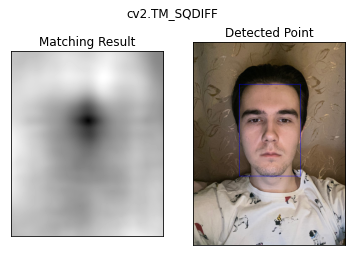

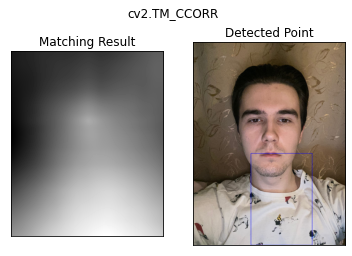

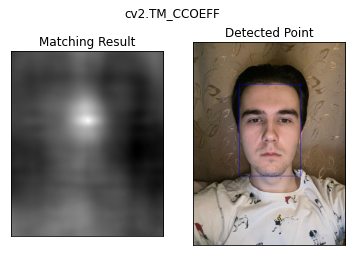

In [12]:
img = cv2.imread('my_photo.jpg')

rgb_template_matching(template, img)

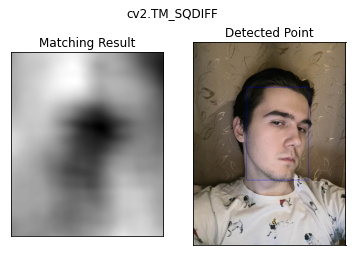

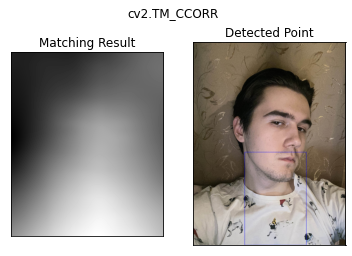

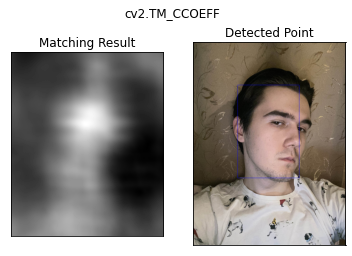

In [ ]:
face_turn_img = cv2.imread('tf.jpg')

rgb_template_matching(template, face_turn_img)

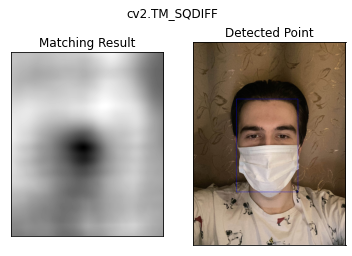

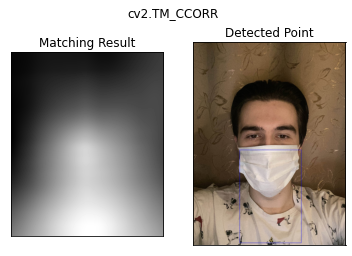

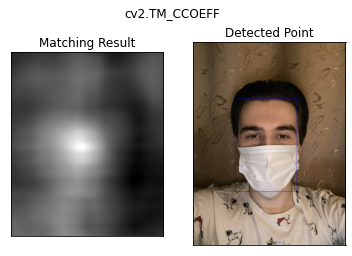

In [ ]:
masked = cv2.imread('masked.jpg')

rgb_template_matching(template, masked)

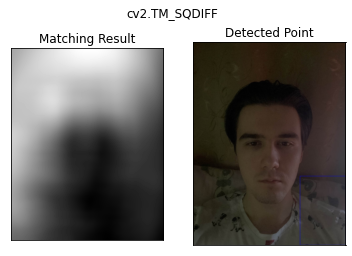

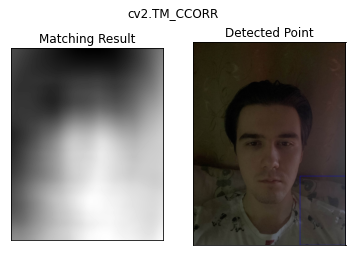

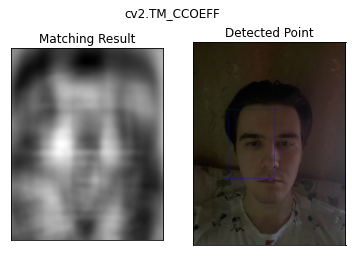

In [14]:
bad_light = cv2.imread('new_bad_light.jpg')
#new_template = cv2.resize(template, (280, 330), interpolation = cv2.INTER_LINEAR)

rgb_template_matching(template, bad_light)

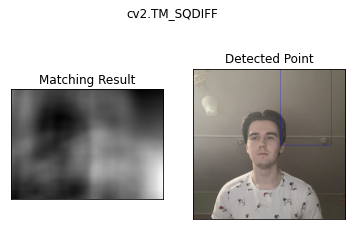

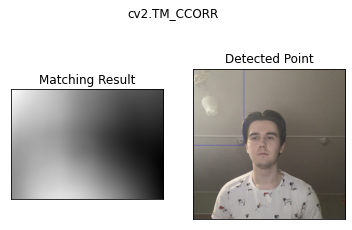

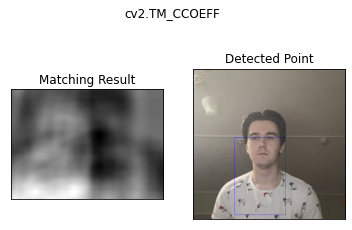

In [ ]:
distant_view = cv2.imread('distant_view.jpg')
#new_template = cv2.resize(template, (280, 330), interpolation = cv2.INTER_LINEAR)

rgb_template_matching(template, distant_view)

In [ ]:
eye_template = cv2.imread('eye.jpg', 0)
#new_template = cv2.resize(template, (280, 330), interpolation = cv2.INTER_LINEAR)

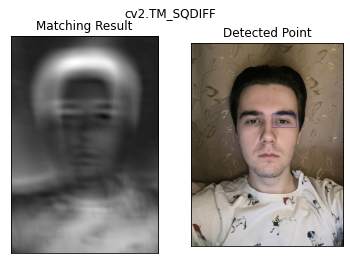

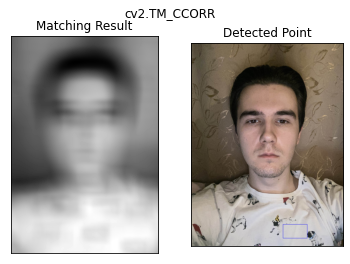

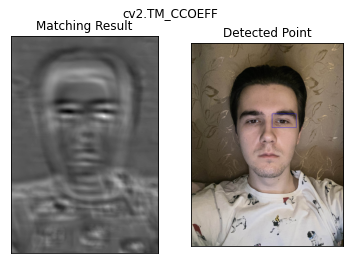

In [ ]:
image = cv2.imread('mp.jpg')


rgb_template_matching(eye_template, image)

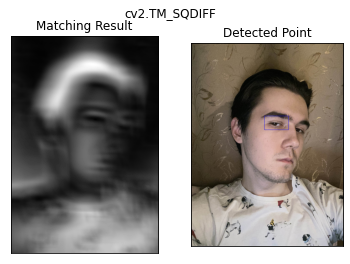

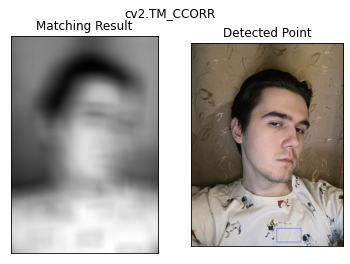

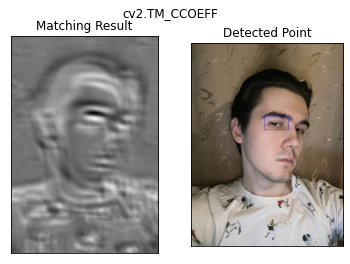

In [ ]:
face_turn_img = cv2.imread('tf.jpg')

rgb_template_matching(eye_template, face_turn_img)

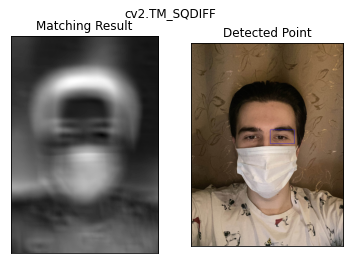

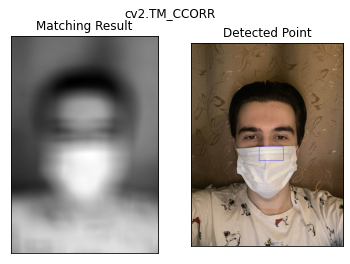

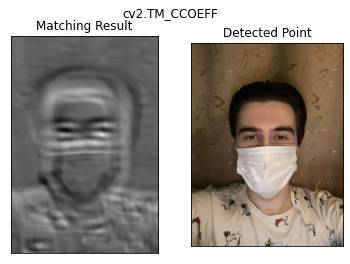

In [ ]:
masked = cv2.imread('masked.jpg')
#new_template = cv2.resize(template, (280, 330), interpolation = cv2.INTER_LINEAR)

rgb_template_matching(eye_template, masked)

In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

img = cv2.imread('new_bad_light.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    #eyes = eye_cascade.detectMultiScale(roi_gray)
    #for (ex,ey,ew,eh) in eyes:
    #    cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)

cv2.imwrite("detected_new_bad_light.jpg", img)
cv2_imshow(img)
cv2.waitKey(0)
cv2.destroyAllWindows()